<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/01_Seaborn_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

In [37]:
from matplotlib import pyplot as plt

In [38]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

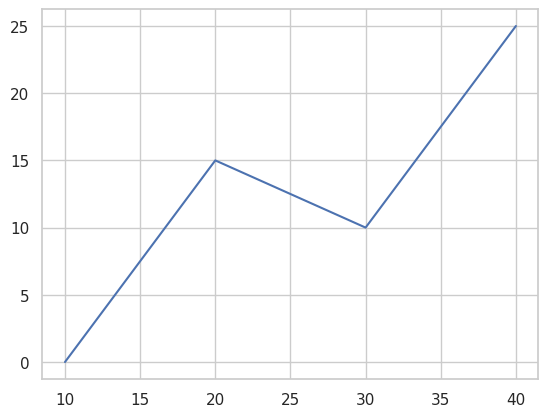

In [39]:
plt.plot(x, y)

# Seaborn

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [40]:
import seaborn as sns

In [41]:
sns.set()

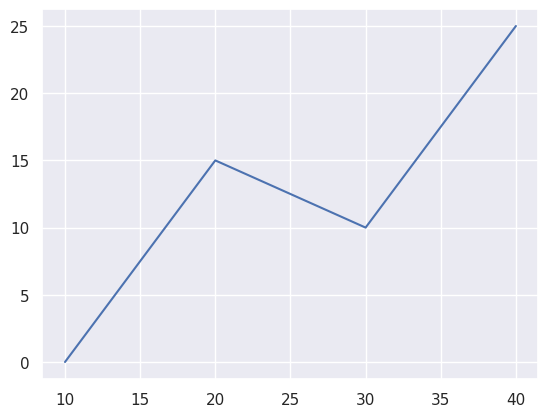

In [42]:
plt.plot(x, y)

In [43]:
sns.set_style("white")

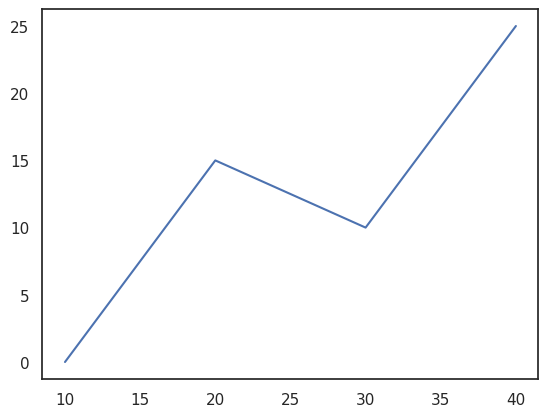

In [44]:
plt.plot(x, y)

#### Versions

In [45]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [46]:
sns.__version__

'0.13.2'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [47]:
cars = sns.load_dataset('mpg')

In [48]:
type(cars)

pandas.core.frame.DataFrame

In [49]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

In [50]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


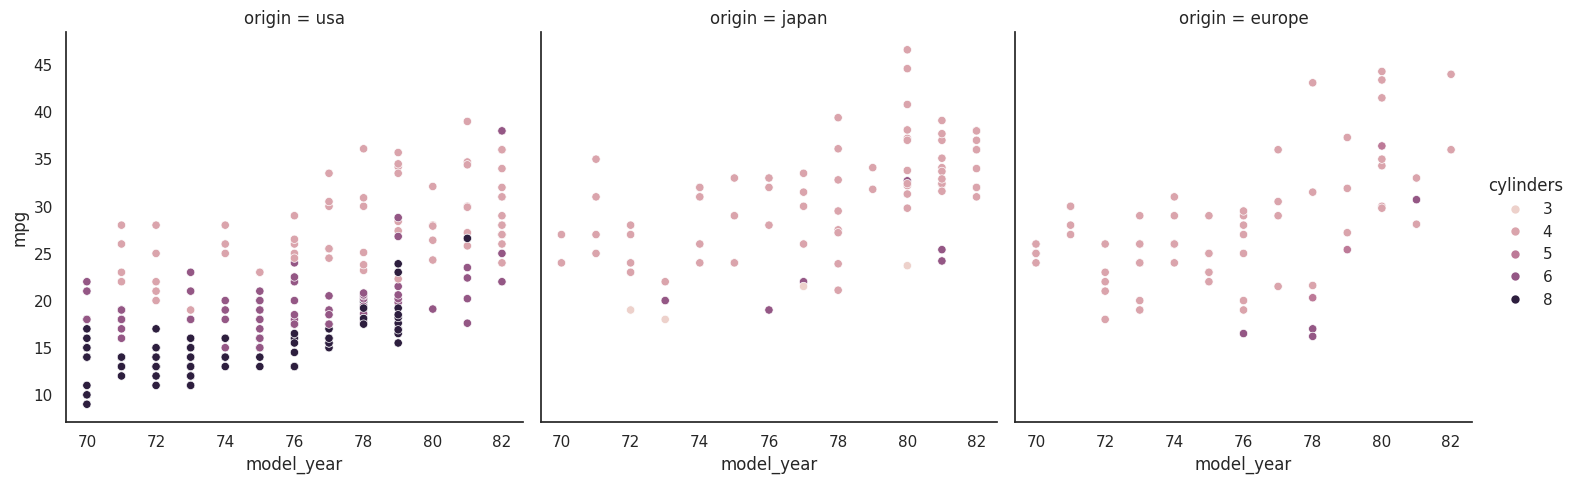

In [51]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders',
            data=cars)

## More Examples

\#3. Seaborn allows for additional plot types and easy plotting functionality

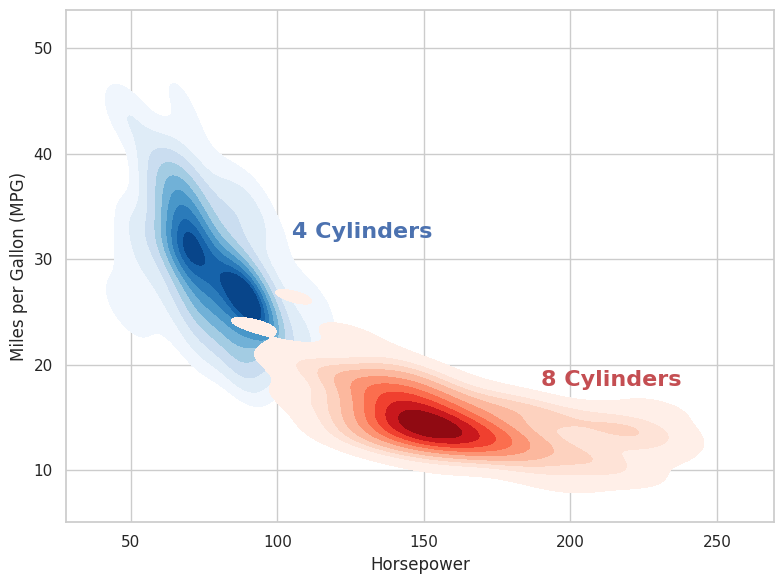

In [52]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders == 4]
cyl_8 = cars[cars.cylinders == 8]

plt.figure(figsize=(8, 6))

# Updated KDE plots
sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg, cmap="Blues", fill=True, thresh=0.05)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg, cmap="Reds", fill=True, thresh=0.05)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

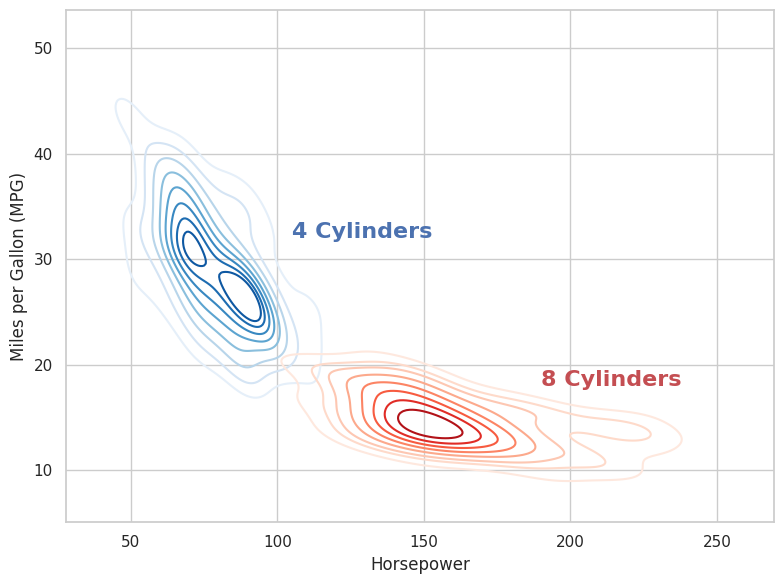

In [53]:
# Set the style
sns.set_style('whitegrid')

# Filter the data
cyl_4 = cars[cars.cylinders == 4]
cyl_8 = cars[cars.cylinders == 8]

# Create the plot
plt.figure(figsize=(8, 6))

# Use updated parameters
sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg, cmap="Blues", fill=False, thresh=0)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg, cmap="Reds", fill=False, thresh=0)

# Add labels and annotations
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

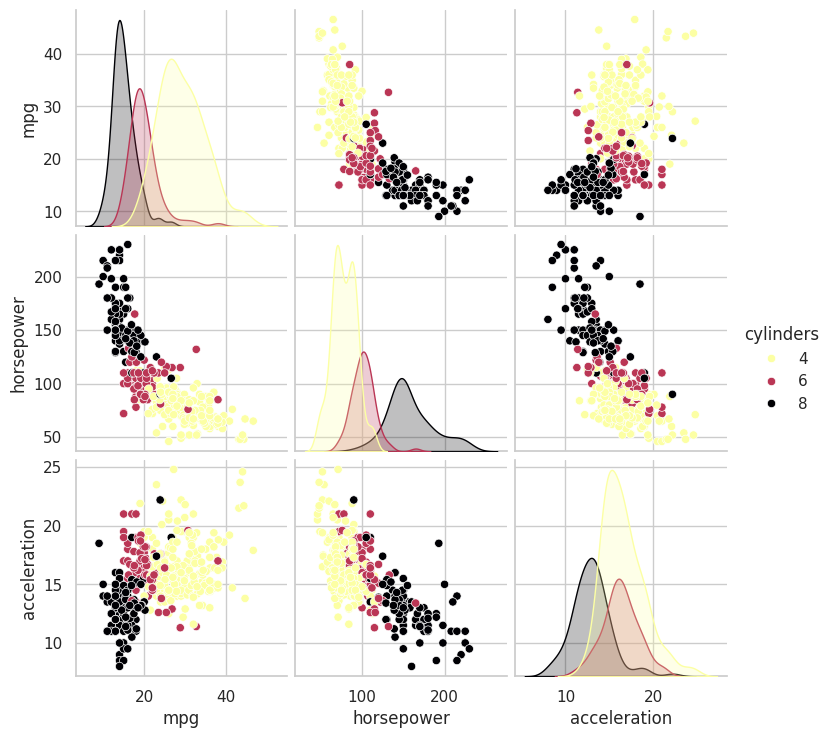

In [54]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])],
             hue='cylinders',
             vars=['mpg', 'horsepower', 'acceleration'],
             palette='inferno_r'
            )

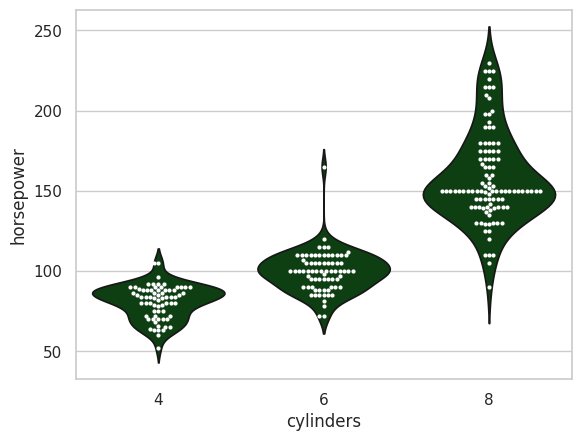

In [55]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower,
               density_norm='width', inner=None, color='xkcd:forest green')

sns.swarmplot(x=usa.cylinders, y=usa.horsepower,
              color='white', size=3)

plt.show()

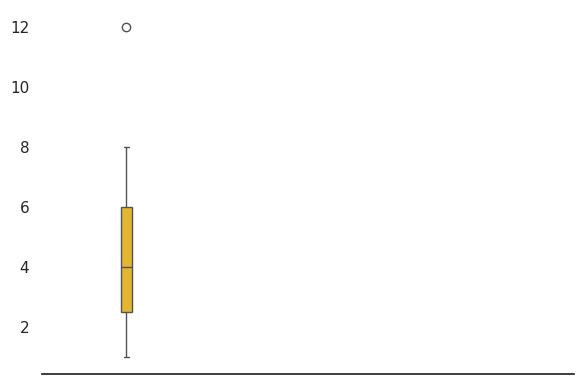

In [56]:
sns.set_style('white')
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=0.4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout()

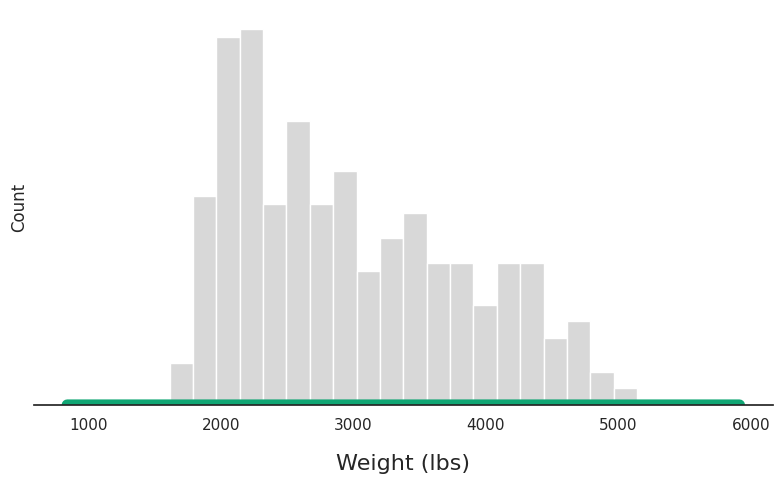

In [57]:
plt.figure(figsize=(8, 5))

sns.histplot(cars.weight, bins=20, color='gray', alpha=0.3, kde=False)
sns.kdeplot(cars.weight, color='xkcd:bluish green', linewidth=8)

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout()

plt.show()

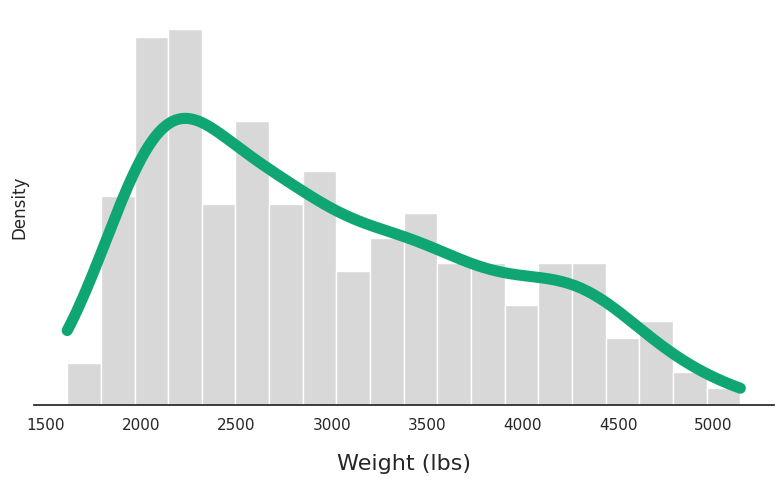

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(data=cars,
            x='weight',
            bins=20,
            stat='density',
            kde=True,
            color='gray',
            alpha=0.3
           )

# Add KDE line styling after the plot
plt.gca().lines[0].set_linewidth(8)
plt.gca().lines[0].set_color('xkcd:bluish green')

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout()

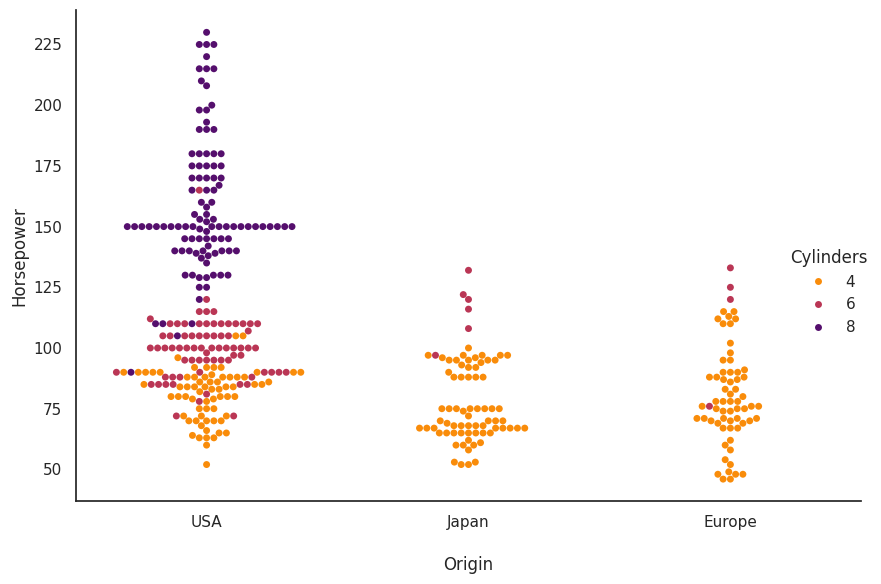

In [59]:
filtered_cars = cars[cars.cylinders.isin([4, 6, 8])]

g = sns.catplot(x='origin', y='horsepower', hue='cylinders',
                kind='swarm',
                palette=sns.color_palette('inferno_r', 3),
                data=filtered_cars,
                height=6, aspect=8/6)  # Adjust height and aspect ratio

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticks([0, 1, 2])  # Set tick positions
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])

g._legend.set_title('Cylinders')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()